<H3> Problem Statement:</h3> 
    
    
<h4> Geely Auto  is a Chinese automobile company which aspires to set up their auto manufacturing hub in the US market as a means of breaking into the American market and thus providing competition to their US and Europena counterparts.

Basically, Geely Autos are highly interested in understanding the facctors which drive the prices of cars and thus, they have hired a consultant. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 


The company intends to understand:

Which variables are significant in predicting the price of a car

How well those variables describe the price of a car </h4>

<h3> Business Goal </h3> 

<h4> Based on the developed model for vehicle pricing, the management of Geely Auto would want to understand exactly which variables affect the pricing of cars in order to make an informed business decision. i.e. how each variables contribute to the pricing of a car. 

With this information, they can adjust the business strategy, tweak the design of the cars, and make any and all necesary adjustments needed to improve their profit margin per unit of car sold. Further, the model will be a good way for management to understand the pricing dynamics of a new market. </h4>

<h3> Reading and understanding the Data </h3> 

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
plt.style.use('ggplot')
sns.set(style='darkgrid')

In [2]:
# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor  #VIF is for detecting presence of colinearity 


In [3]:
#Reading in the data

df = pd.read_csv('car_price_data.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [5]:
#Reading the data dictionary

excel_file = pd.ExcelFile('car_price_dictionary.xlsx')

In [6]:
#check the sheet names of the files in your excel database
excel_file.sheet_names

['Sheet1']

In [7]:
df_dict = pd.read_excel(excel_file, 'Sheet1', header = 3)

In [8]:
df_dict[['Car_ID', 'Unique id of each observation (Interger)']] 

,Car_ID,Unique id of each observation (Interger)
0,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
1,carCompany,Name of car company (Categorical)
2,fueltype,Car fuel type i.e gas or diesel (Categorical)
3,aspiration,Aspiration used in a car (Categorical)
4,doornumber,Number of doors in a car (Categorical)
5,carbody,body of car (Categorical)
6,drivewheel,type of drive wheel (Categorical)
7,enginelocation,Location of car engine (Categorical)
8,wheelbase,Weelbase of car (Numeric)
9,carlength,Length of car (Numeric)


In [9]:
#Understanding the dataframe 

In [10]:
df.shape

(205, 26)

In [11]:
#statistical description of the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [12]:
#information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

<h4> Data Wrangling Time </h4> 

<h3> As good practice, start by creating a copy of the original data </h3> 

In [13]:
df_copy = df.copy()

In [14]:
df_copy.duplicated(subset = 'car_ID').sum()

0

In [15]:
#From the above code, we have no duplicated data 

In [16]:
#the Car_ID is obviously not necessary so we have to drop that column 

del(df_copy['car_ID'])

In [17]:
#test 
df_copy.head(2)

#from the dataframe below, the car_id is gone

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000


In [18]:
#check for missing data in your dataframe 

df_copy.isnull().sum()

#there are no missing values in the dataframe

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

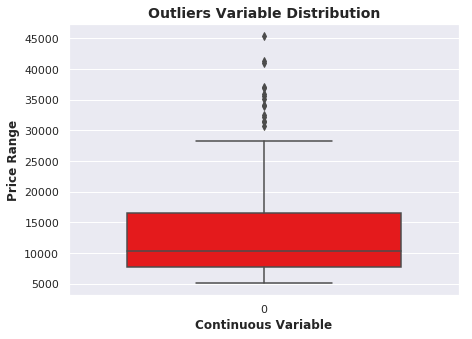

In [19]:
#Outlier analysis of Target varible 

fig, ax = plt.subplots(figsize = (7, 5))
sns.boxplot(data=df_copy['price'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7);
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold');
plt.ylabel("Price Range", fontweight = 'bold');
plt.xlabel("Continuous Variable", fontweight = 'bold');


<h4> From the above, majority of the prices of the cars range from around 7, 000 to 17, 000. All vehicles above a price range of 30, 000 are outliers and probably new vehicles introduced into the market </h3>

In [20]:
df_copy['CarName'].unique()
#Given the amount of different car names, creating a dummy variable from this column would means a very complex dataset so we have to truncate
#the name to represent only the company car name rather than both the company car name and the model 

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [21]:
df_copy['CarName'] = df_copy['CarName'].str.split(' ').str[0]

In [22]:
#Test the code
df_copy['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [23]:
#Some car names are spelt wrongly and needs to be corrected.  such as 

# maxda = mazda
# Nissan = nissan
# porsche = porcshce
# toyota = toyouta
# vokswagen = volkswagen = vw

In [24]:
df_copy.replace({'maxda': 'Mazda', 'mazda': 'Mazda'}, regex = True, inplace = True)
df_copy.replace({'vokswagen': 'volkswagen'}, regex = True, inplace = True)
df_copy.replace({'vw': 'volkswagen'}, regex = True, inplace = True)
df_copy.replace({'toyouta': 'toyota'}, regex = True, inplace = True)
df_copy.replace({'porsche': 'porcshce'}, regex = True, inplace = True)
df_copy.replace({'nissan': 'Nissan'}, regex = True, inplace = True)

In [25]:
#Test the code above 
df_copy['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'Mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [26]:
df_copy['symboling'].unique()
#given the symboling is a category we need to change the datatype fro int64 to category 

array([ 3,  1,  2,  0, -1, -2])

In [27]:
df_copy['symboling'] = df_copy['symboling'].astype('category')

In [28]:
#Test code
print(df_copy['symboling'].dtype)

category


<h4> Time to Segregate Numerical and Categorical data types </h4> 

In [29]:
#select only the subset of the dataframe that contain only strings
cat_col = df_copy.select_dtypes(include = 'object')
cat_col.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [30]:
#selct the subset of the dataframe that contains on numerical values
num_col = df_copy.select_dtypes(exclude= ['object', 'category'])
num_col.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


<h3> Data Visualization step </h3> 

<h4> Start by visualizing all the available car types </h4> 

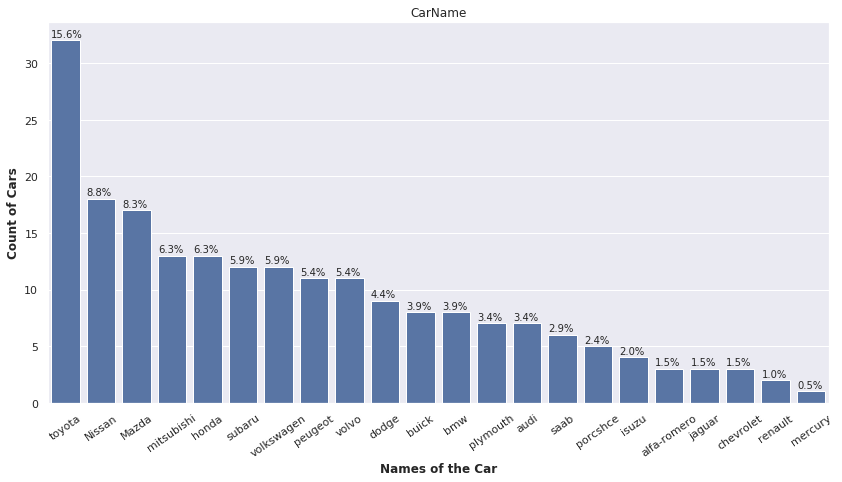

In [31]:
cat_count = cat_col['CarName'].value_counts()
cat_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize = (14, 7))
sns.countplot(x = 'CarName', data = cat_col, color = cat_color, order = cat_count.index);
plt.xticks(rotation = 35);
plt.title('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

for p in ax.patches: 
    
    width, height = p.get_width(), p.get_height()
    
    p.set_width(0.8)
    
    x, y = p.get_xy()
    
    ax.annotate('{:.1%}'.format(height/205), (x, y + height + 0.3))

<h4> From the above graph, Toyota is the most preferred vehicle by consumers </h4> 

<h4> From the above graph, Mercury is the least preferred vehicle by consumers. </h4>

<h5> Visualize the distribution of car prices </h5> 

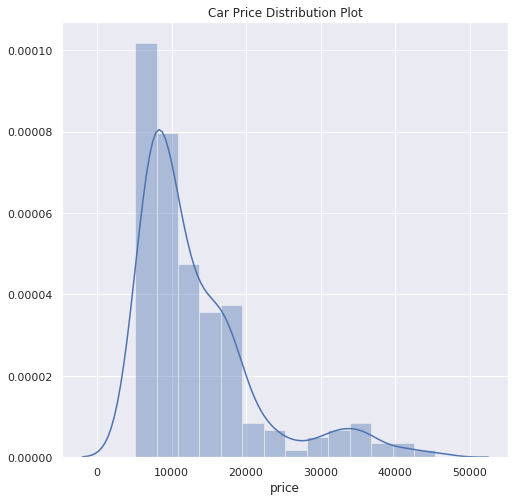

In [32]:
plt.figure(figsize=(8,8))
sns.distplot(num_col['price']);
plt.title('Car Price Distribution Plot');

In [33]:
# From the above the plots, the histogram is right skewed, and the prices of almost all cars looks like less than 18000

<h4> Visualize all numeric variable </h4> 


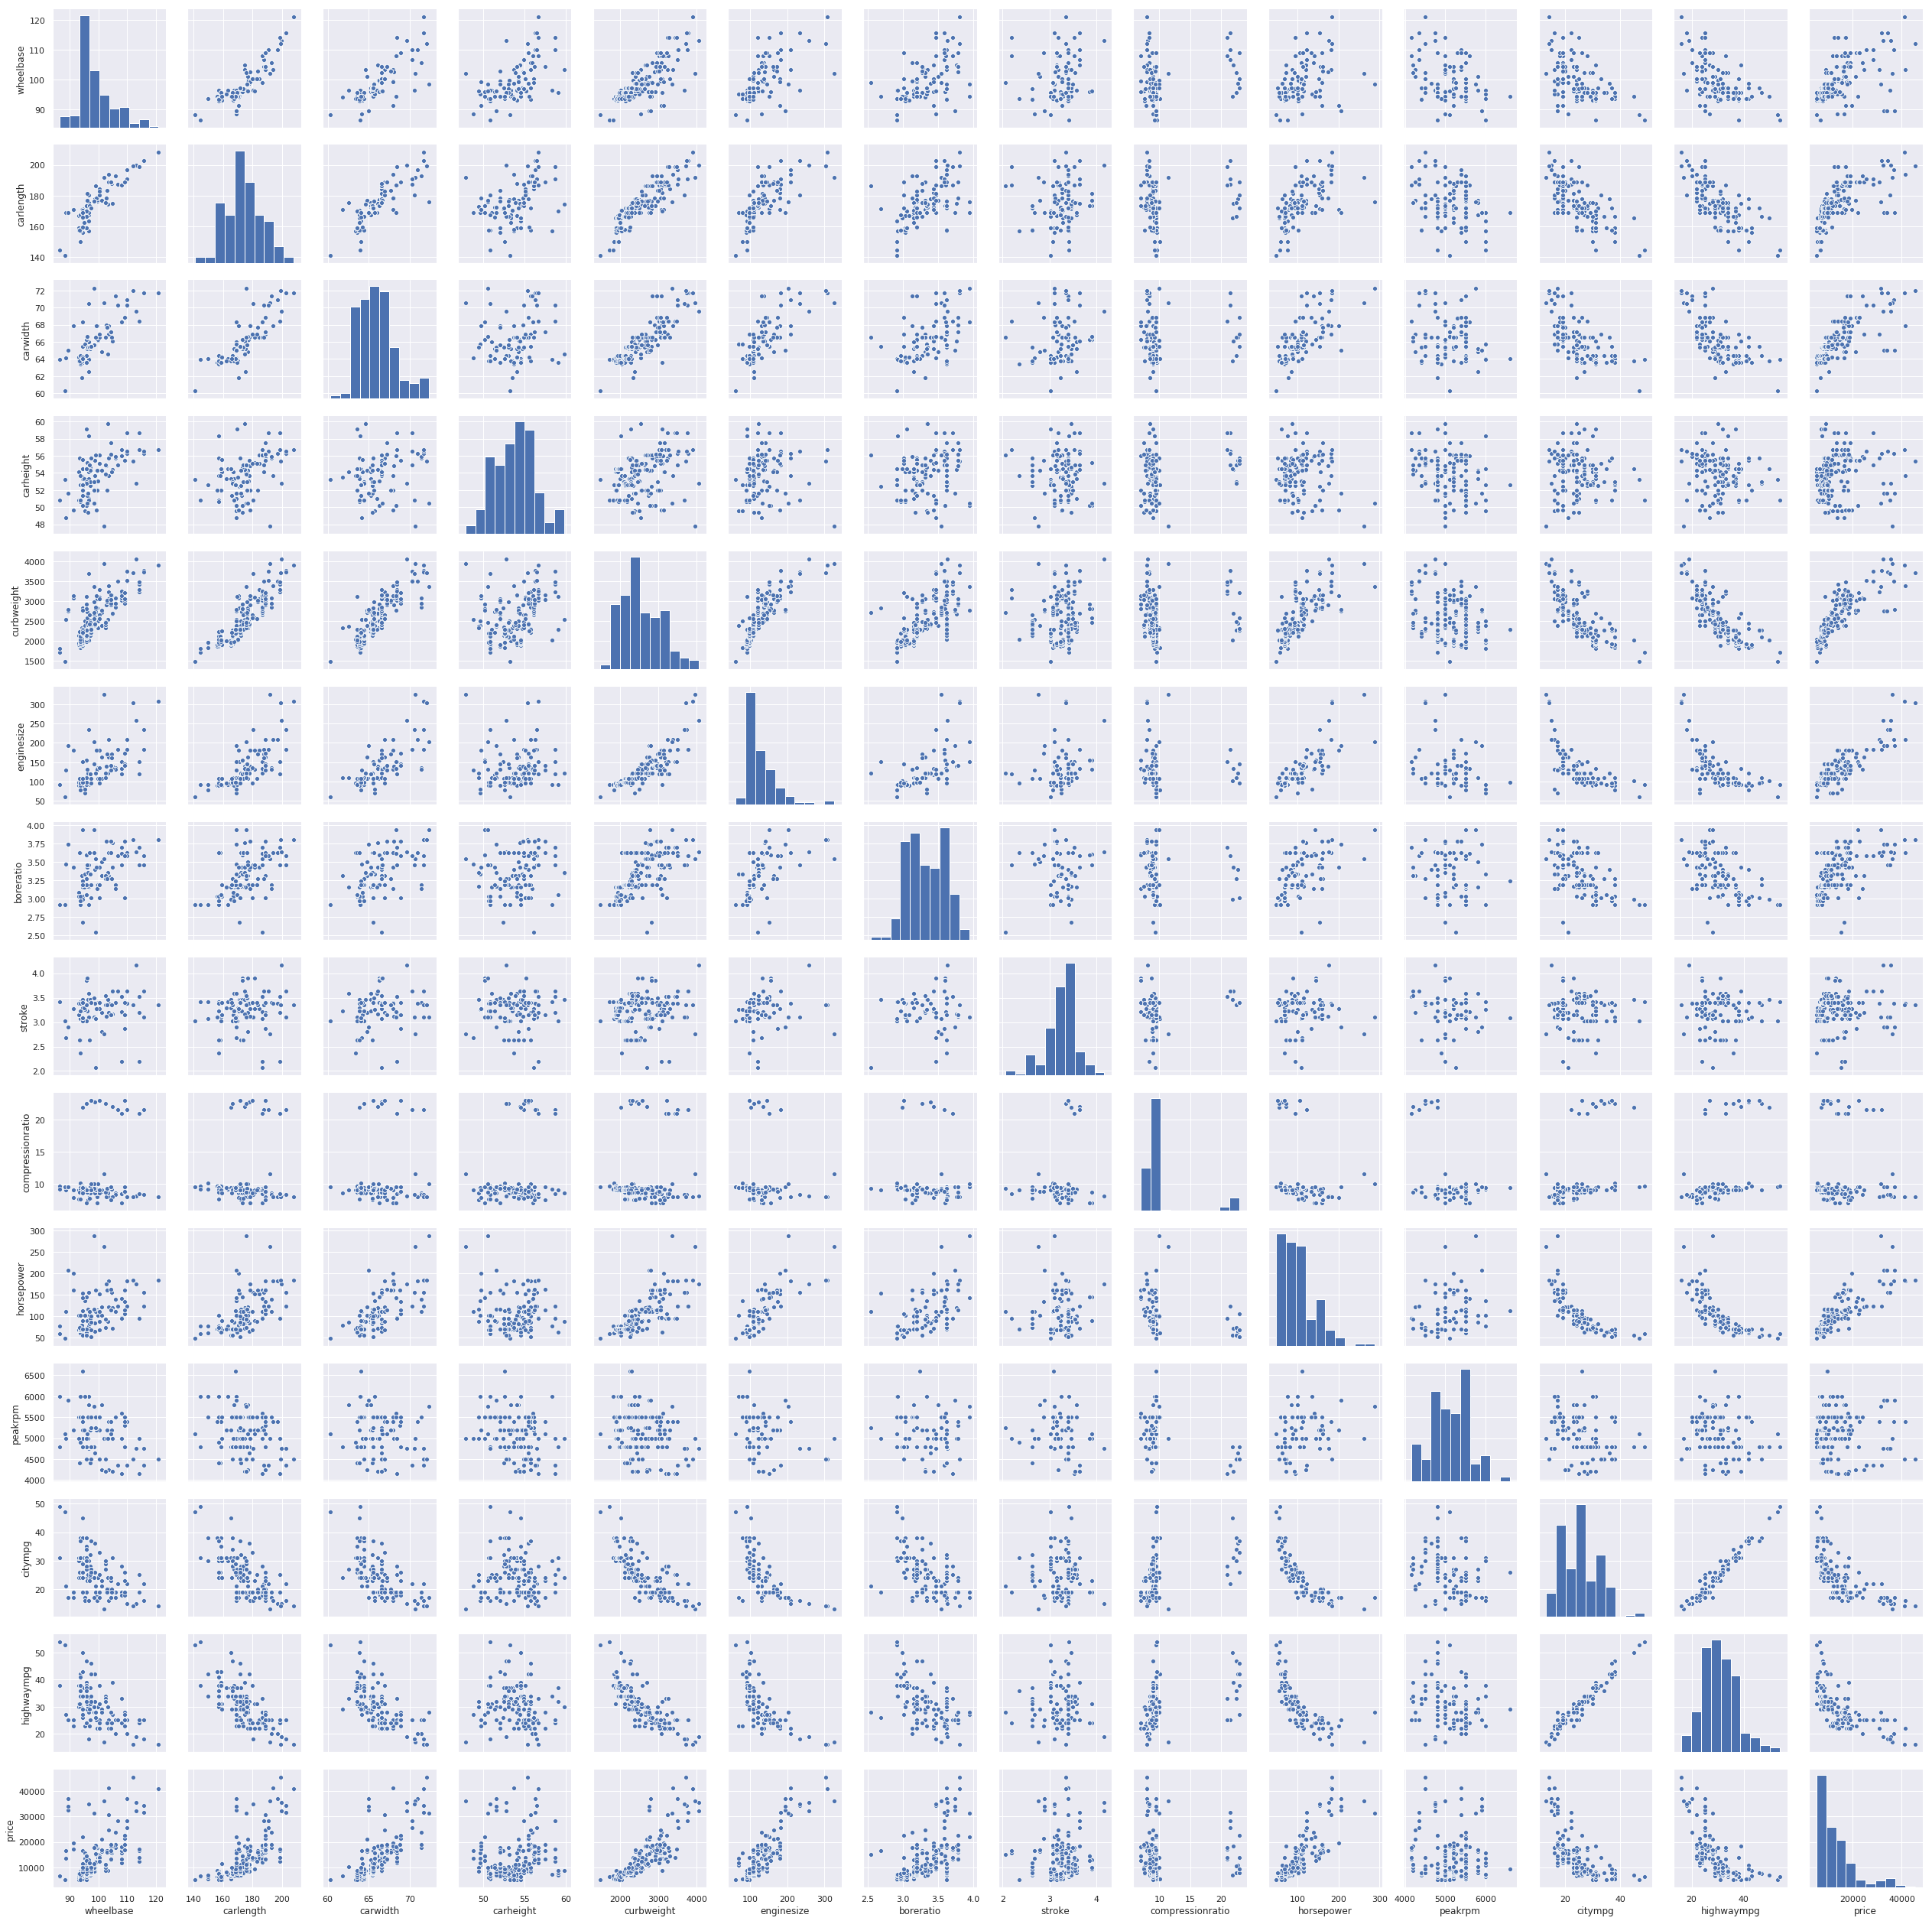

In [34]:
sns.pairplot(num_col);

<h4> Time to check for regression problems including - Interaction terms, collinearity, higher order terms  </h4> 

<h4> Insights: </h4> 

carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.

carheight doesn't show any significant trend with price.

citympg , highwaympg - seem to have a significant negative correlation with price. </h4>

In [35]:
#check which independent variables obey the law of linear regression and which do not
df_corr = num_col.corr()

<h4> For easy reference, we will use coloring to determine high positive and negative correlations from the correlation dataframe </h4> 

In [36]:
#def highlight_corr(df): 
#    
#    if df > 0.79:
#        return ['color: red']
#    elif df < -0.79:
#        return ['color: yellow']
    
    
def highlight_corr(val):
    color = 'red' if val > 0.79 else 'black'
    return 'color: %s' % color



In [37]:
#
df_corr.style.applymap(highlight_corr)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1,0.874587,0.795144,0.589435,0.776386,0.569329,0.48875,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1,0.841118,0.491029,0.877728,0.68336,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.68292
carwidth,0.795144,0.841118,1,0.27921,0.867032,0.735433,0.55915,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.27921,1,0.295572,0.0671487,0.171071,-0.0553067,0.261214,-0.108802,-0.320411,-0.0486396,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1,0.850594,0.64848,0.16879,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.68336,0.735433,0.0671487,0.850594,1,0.583774,0.203129,0.0289714,0.809769,-0.24466,-0.653658,-0.67747,0.874145
boreratio,0.48875,0.606454,0.55915,0.171071,0.64848,0.583774,1,-0.055909,0.00519734,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.0553067,0.16879,0.203129,-0.055909,1,0.18611,0.0809395,-0.0679638,-0.0421448,-0.0439309,0.0794431
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.0289714,0.00519734,0.18611,1,-0.204326,-0.435741,0.324701,0.265201,0.0679835
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.0809395,-0.204326,1,0.131073,-0.801456,-0.770544,0.808139


<h3> In total, there are 13 numerical variables. </h3> 

<h4> carlength, curbweight, enginesize, horsepower, carwidth, wheelbase, boreratio are positively correlated with the price </h4> 

<h4> citympg, highwaympg are highly negatively correlated with price </h4> 

<h4> stroke, compressionratio, peakrpm have an extremetly weak correlation with the price and thus would not be useful in the prediction of price. </h4> 

<h4> Based on the correlation above, most variables have a very high correlation with other independent variables which indicates colinearity</h4> 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<h4> Given that we are using statsmodel we need to add an intercept and also the independent variable from which we would want to find the presence of colinearity  </h4> 

In [39]:
#get the variables from which you would want to detect the presence of colinearity 

X_col = num_col.drop('price', axis = 1)
X_col['intercept'] = 1

In [40]:
#create a dataframe to store your variance inflation values 

vif = pd.DataFrame()
vif['variables'] = X_col.columns
vif['VIFs'] = [variance_inflation_factor(X_col.values, i) for i in range(X_col.shape[1])]

#NB: at this point you are looping and the VIF is calculated per each column in the dataframe

In [41]:
#print the VIF dataframe 
vif

,variables,VIFs
0,wheelbase,7.3409
1,carlength,9.4230
2,carwidth,5.5864
3,carheight,2.2060
4,curbweight,16.4134
5,enginesize,6.6590
6,boreratio,2.1039
7,stroke,1.1958
8,compressionratio,2.1755
9,horsepower,8.2479


<H4> From the above, curbweight, citympg, and highwaympg are all collinear and thus one or two variable would have to be removed  </h4> 

<h4> From the pairplot, citympg and highwaympg are highly positively correlated while curbweight and carlength are also highly positively correlated. Therefore inorder to tell which variable to keep we would determine which variable is more correlated with price </h4> 

In [42]:
num_col[['highwaympg', 'citympg', 'price']].corr()

,highwaympg,citympg,price
highwaympg,1.0000,0.9713,-0.6976
citympg,0.9713,1.0000,-0.6858
price,-0.6976,-0.6858,1.0000


<H4> From the above, highwaympg is more correlated with price that citympg and thus, we drop citympg <h4>

In [43]:
#Delete citympg
del(num_col['citympg'])

In [44]:
#test the code above 
num_col.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'highwaympg', 'price'],
      dtype='object')


<H3> Re_compute the VIF </h3> 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
X_col = num_col.drop('price', axis = 1)
X_col['intercept'] = 1

In [47]:
VIF = pd.DataFrame()
VIF['variables'] = X_col.columns
VIF['vifs'] = [variance_inflation_factor(X_col.values, i) for i in range(X_col.shape[1])]

In [48]:
VIF

,variables,vifs
0,wheelbase,6.9275
1,carlength,8.5777
2,carwidth,5.5824
3,carheight,2.2004
4,curbweight,16.4098
5,enginesize,6.3451
6,boreratio,2.0888
7,stroke,1.1806
8,compressionratio,2.0578
9,horsepower,7.4997


<h4> From the graph, curbeweight is highly positively correlated with carlength. Therefore, we need to check between the curbweight and the carlength which is highly correlated with the dependent variable of price </h4> 

In [49]:
num_col[['curbweight', 'carlength', 'price']].corr()

,curbweight,carlength,price
curbweight,1.0000,0.8777,0.8353
carlength,0.8777,1.0000,0.6829
price,0.8353,0.6829,1.0000


<h3> From the above, it is obvious the curbweight is more hihgly correlated with with price that carlength. Therefore we need to drop the carlength </h4> 

In [50]:
del(num_col['curbweight'])

In [51]:
#test the code to ensure that the curbweight and the citympg has been dropped 
num_col.head(2)

,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,88.6000,168.8000,64.1000,48.8000,130,3.4700,2.6800,9.0000,111,5000,27,13495.0000
1,88.6000,168.8000,64.1000,48.8000,130,3.4700,2.6800,9.0000,111,5000,27,16500.0000


<h4> Thus far, our variable has reduced from 13 to 11 </h4> 

<h3> For the last time, we have to re-compute our variance inflation factor to ensure there are no further colinearities </h3> 

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
X_col = num_col.drop('price', axis = 1)
X_col['intercept'] = 1

In [54]:
VIF = pd.DataFrame()
VIF['variable'] = X_col.columns
VIF['vifs'] = [variance_inflation_factor(X_col.values, i) for i in range(X_col.shape[1])]

In [55]:
VIF

,variable,vifs
0,wheelbase,6.7030
1,carlength,7.9807
2,carwidth,5.4510
3,carheight,2.1897
4,enginesize,5.5975
5,boreratio,2.0888
6,stroke,1.1798
7,compressionratio,1.6976
8,horsepower,6.8588
9,peakrpm,1.9845


<h4> From the above, we have no more colinearity in our numeric dataset </h4> 

<h4> Time to visualize our categorical data using boxplots to see how useful they are </h4> 

In [56]:
#we have to add the dependent variable to it which is price 

cat_col_plot = cat_col.join(np.round((num_col['price']), 0))
cat_col_plot.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0000


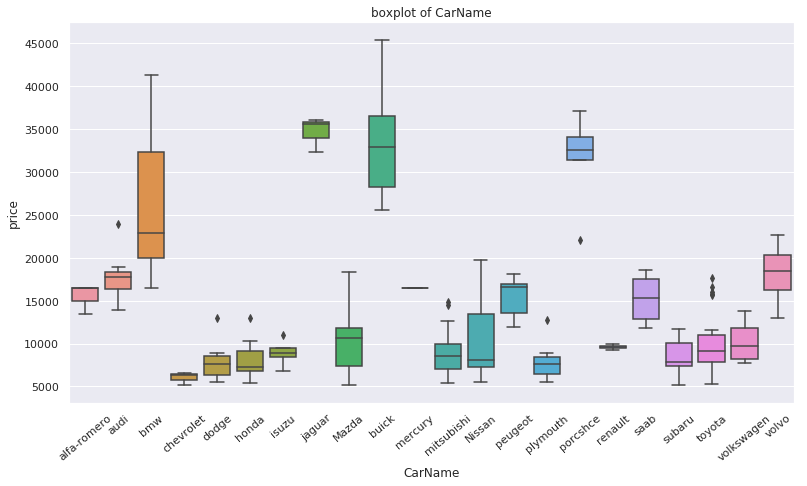

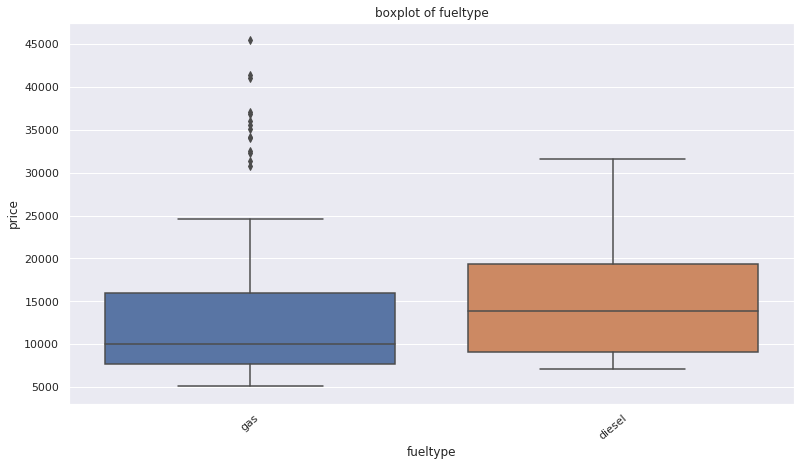

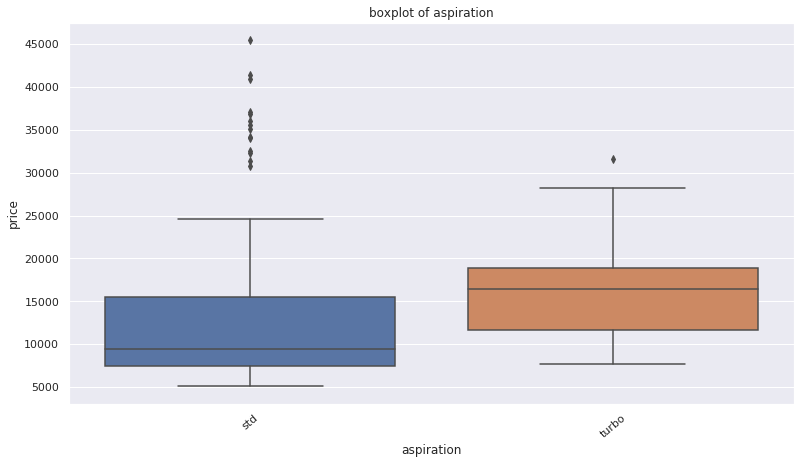

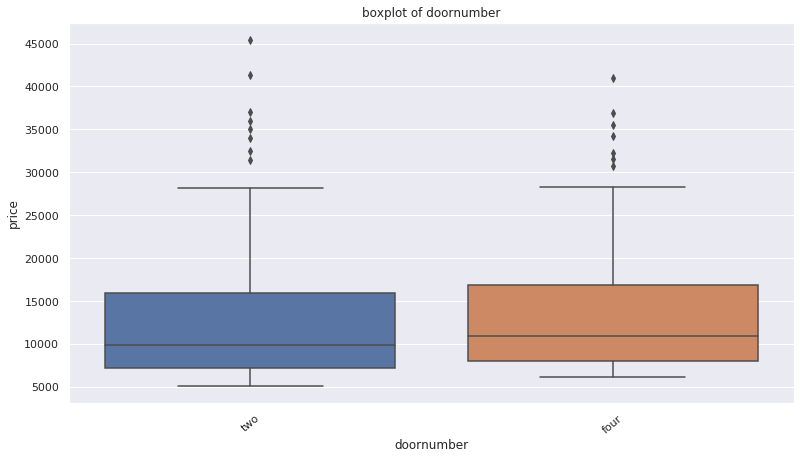

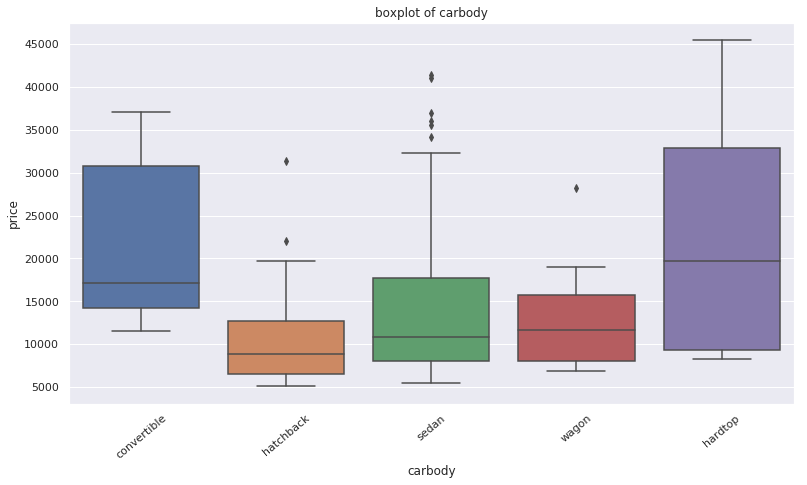

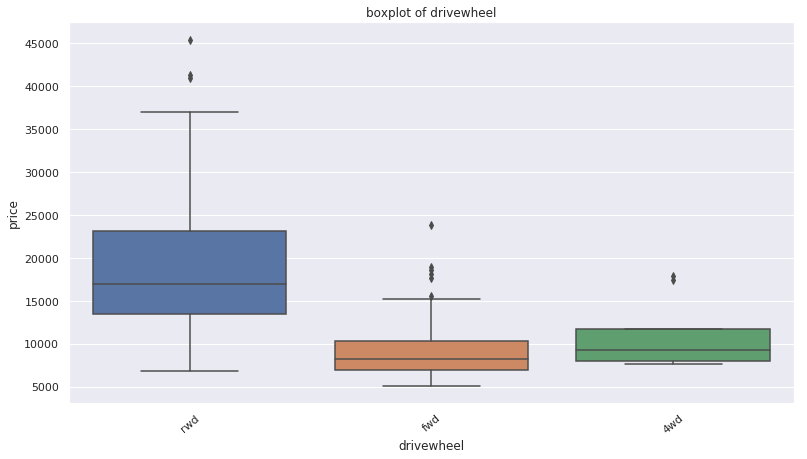

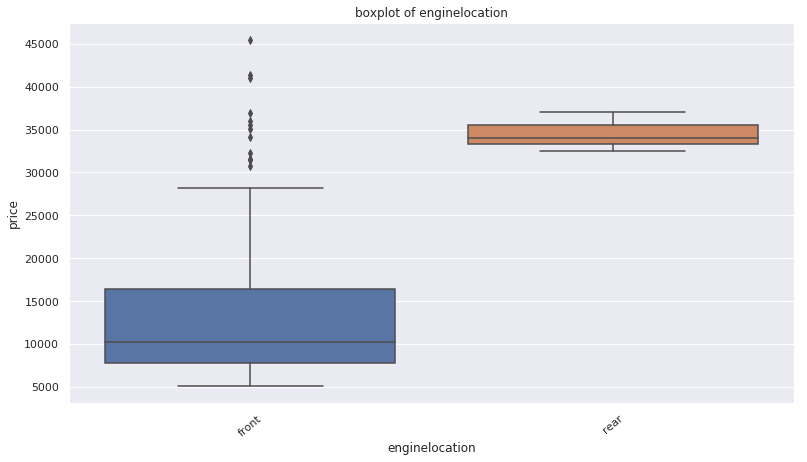

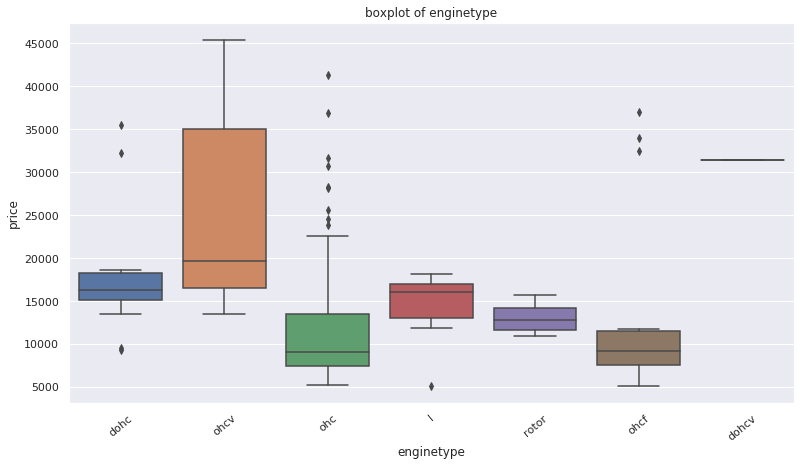

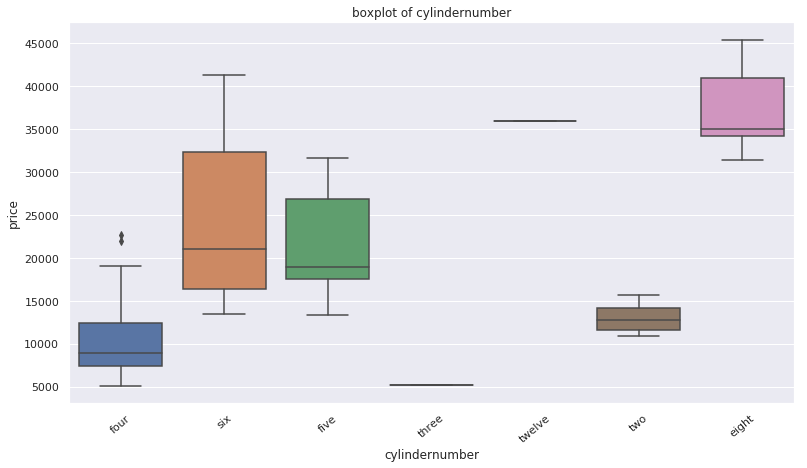

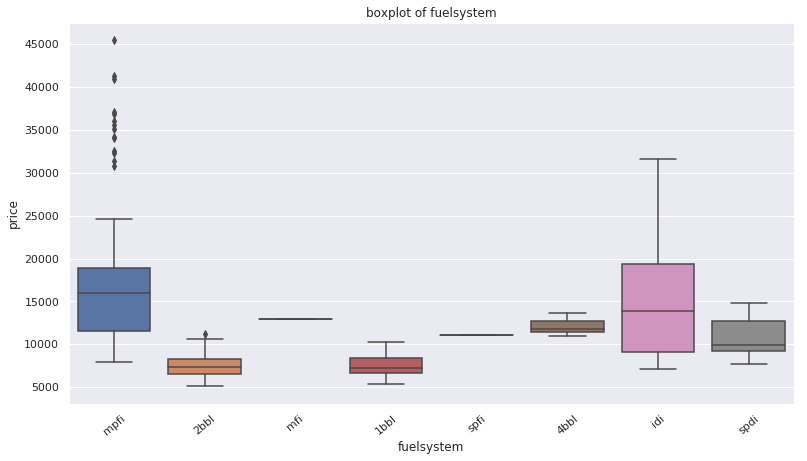

In [57]:
#we creaet a loop with our boxplots for all 10 categorical variables

def boxplot(variables):
    for variable in variables:
    
        fig, ax = plt.subplots(figsize = (13, 7))

        sns.boxplot(x = variable, y = 'price', data = cat_col_plot);
        plt.title('boxplot of ' + variable);
        plt.xticks(rotation = 40);
        plt.show()

lists = ['CarName', 'fueltype' ,'aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
boxplot(lists)


In [58]:
#Analysis of the above graph, 

# carname is a useful variable as all the variable do not yield the same result. Jaguar is the most expensive vehicle while chevrolet is the least expensive vehicle
# 
# fueltype is useful as gas and diesel vehicle are priced differently. Diesel vehicles are much more expensive that gas vehicles 
# 
# Aspiration is useful as Std and turbo yield different prices. turbo vehicles are more expensive that std vehicles 
# 
# Door number is not so useful as the difference in price is almost insignificant (we might have to drop/include it depending on the performance of the model). 
# Four door vehicles cost slightly more two door vehicles. 
# 
# 
# Carbody is very useful as different car body results in different vehicle prices 
# 
# Drivewheel is very useful as 'rwd' drivewheel vehicles are the costliest vehicles 
# 
# Engine location is very important as vehichle with their engines positioned at the rear of the vehicle are more expensive. 
# 
# 
# Engine type is a very important variable as dohcv is seems rare and least in number is the most expensive engine type 
# 
# Cylinder number is very important as twelve cylinder vehicles happen to be the most expensive
# 
# 
# Fuel system is important in the prediction of vehicle prices as mpfi fulesystem vehicles are the most expensive of the bunch. 



<h4> NOTE: We would have to drop the door number since it does not result in a significant difference in price </h4> 

<h3> Data Preparation </h3> 

In [59]:
#time to convert all the categorical variables into numerical using dummies 

num_col.head(2)

,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,88.6000,168.8000,64.1000,48.8000,130,3.4700,2.6800,9.0000,111,5000,27,13495.0000
1,88.6000,168.8000,64.1000,48.8000,130,3.4700,2.6800,9.0000,111,5000,27,16500.0000


In [60]:
#drop the door number 
cat_col.drop('doornumber', axis = 1, inplace = True)

In [61]:
#Test
cat_col.head(0)

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem


In [62]:
dummies = pd.get_dummies(cat_col, drop_first= True)

In [63]:
df_model = dummies.join(num_col)

In [64]:
df_model.head(2)

,CarName_Nissan,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porcshce,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,88.6000,168.8000,64.1000,48.8000,130,3.4700,2.6800,9.0000,111,5000,27,13495.0000
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,88.6000,168.8000,64.1000,48.8000,130,3.4700,2.6800,9.0000,111,5000,27,16500.0000


In [65]:
df_model.shape

(205, 61)

<h4> split the dataframe </h4>


In [87]:
X = df_model.drop('price', axis = 1).copy()
y = df_model['price'].copy()

In [88]:
X.shape, y.shape

((205, 60), (205,))

In [108]:
y = np.array(y).reshape(-1, 1)

<h3> Here we split out data into training and test set. And given that we are conducting a regression task, we use the K_Fold for shuffuling our data </h3>

In [109]:
from sklearn.model_selection import KFold

In [110]:
kfold = KFold(n_splits= 3, shuffle = True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [112]:
#check the shape of your train and test data 
X_train.shape, y_train.shape

((164, 60), (164, 1))

In [113]:
X_test.shape, y_test.shape

((41, 60), (41, 1))

<h4> Time to select the right model for our task - model selection using cross validation<h4> 

In [114]:
#import a scoring function

from sklearn.metrics import make_scorer, r2_score

In [115]:
scorer = make_scorer(r2_score)

In [116]:
models = [Lasso(), Ridge(), ElasticNet(), SGDRegressor()]

for model in models: 
    score = np.mean(cross_val_score(model, X, y))
    print('The score of the ', model, ' model is ', score)
    print(' ')
    

The score of the  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)  model is  0.39960914646315615
 
The score of the  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)  model is  0.6000529361099424
 
The score of the  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)  model is  0.694136775987082
 
The score of the  SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, 

<h4> From the above, Elastic net regression outperformed all the other regressions </h4> 

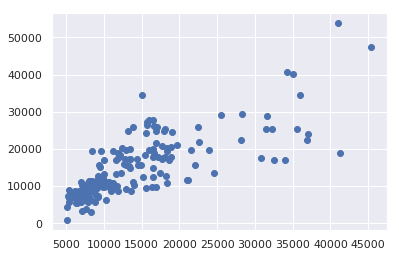

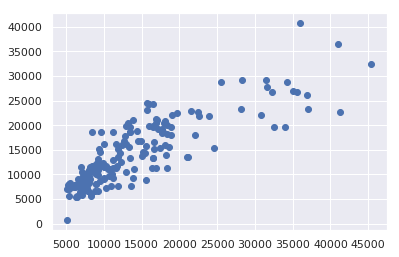

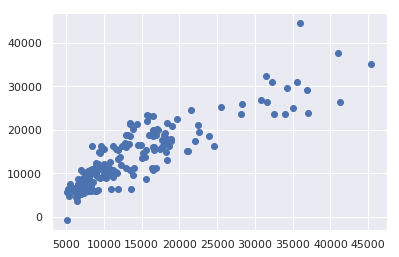

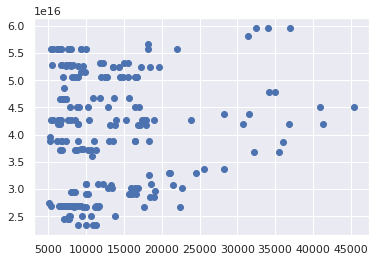

In [117]:
models = [Lasso(), Ridge(), ElasticNet(), SGDRegressor()]

for model in models: 
    predict = cross_val_predict(model, X, y)
    plt.scatter(y, predict);
    plt.show();
    
    print(' ')
    

<h3> From the above, the third plot is the plot of elastic net regression which shows the best possible correlation between the predicted and actual variable </h3>

In [118]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.impute import SimpleImputer


In [119]:
#Instantiate the model 
elasticnet = ElasticNet(random_state = 42)

In [120]:
#we can check out the parameters of the elastic net for reference using getparams()
elasticnet.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [121]:
#Define the steps that go into the pipeline 
steps = [('scaler', StandardScaler()), ('select_feature', SelectKBest(f_regression)), ('imp', SimpleImputer()), ('elasticnet', elasticnet)]

In [122]:
pipeline = Pipeline(steps)

In [123]:
params = [{'select_feature__k': np.arange(1, 50, 1)}]

In [124]:
gridsearch = GridSearchCV(pipeline, param_grid= params, cv = kfold, scoring = scorer, n_jobs= -1, return_train_score= True)

In [125]:
gridsearch.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('select_feature', SelectKBest(k=10, score_func=<function f_regression at 0x7fec59342f28>)), ('imp', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('elasticnet', ElasticN...=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'select_feature__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(r2_score), verbose=0)

In [139]:
y_pred= gridsearch.predict(X_test)


In [149]:
df_cv_result = pd.DataFrame(gridsearch.cv_results_)
df_cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_select_feature__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.0116,0.0057,0.0026,0.0019,1,{'select_feature__k': 1},0.7278,0.6057,0.6260,0.6533,0.0536,49,0.6241,0.6874,0.6822,0.6645,0.0287
1,0.0088,0.0047,0.0031,0.0026,2,{'select_feature__k': 2},0.7748,0.7009,0.7421,0.7392,0.0303,48,0.7287,0.7538,0.7555,0.7460,0.0122
2,0.0100,0.0001,0.0030,0.0025,3,{'select_feature__k': 3},0.7905,0.7473,0.7449,0.7610,0.0210,47,0.7445,0.7990,0.8129,0.7855,0.0295
3,0.0094,0.0008,0.0036,0.0022,4,{'select_feature__k': 4},0.8320,0.7747,0.7418,0.7831,0.0373,42,0.7617,0.8147,0.8156,0.7973,0.0252
4,0.0093,0.0035,0.0013,0.0001,5,{'select_feature__k': 5},0.8394,0.7856,0.7702,0.7986,0.0297,39,0.7853,0.8155,0.8271,0.8093,0.0176


In [151]:
df_overfit  = df_cv_result[['mean_test_score','std_test_score','mean_train_score','std_train_score']]

In [153]:
#average the mean test and train score and compare them 
np.mean(df_overfit['mean_train_score']), np.mean(df_overfit['mean_test_score'])

(0.8913767211909687, 0.8337135336095897)

In [157]:
#create a data frame and store both the predicted and the true values
df_result = pd.DataFrame(data = {'predicted_values': y_pred.ravel(), 'True_value': y_test.ravel()}) 
df_result['Difference'] =  df_result['True_value'] - df_result['predicted_values'] 
df_result.head()

,predicted_values,True_value,Difference
0,25547.5157,30760.0000,5212.4843
1,18325.0943,17859.1670,-465.9273
2,10081.6928,9549.0000,-532.6928
3,12605.8300,11850.0000,-755.8300
4,29761.2476,28248.0000,-1513.2476


<h5> Visualization of accuracy </h5>

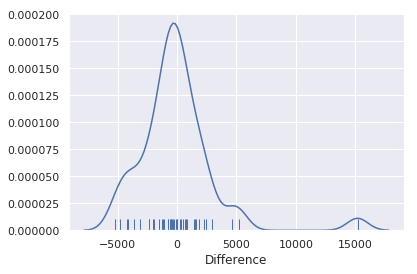

In [161]:
#Plot of the error. From the plot, the model needs some tunning as the error is bi-model but because of the power of my computer, I cannot
sns.distplot(df_result['Difference'], rug = True, hist = False);

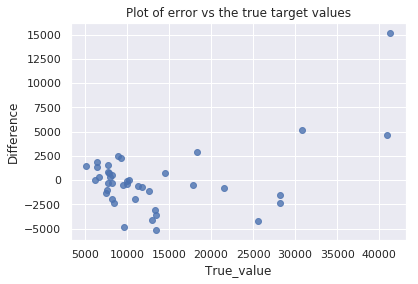

In [164]:
sns.regplot(x = 'True_value', y = 'Difference', data = df_result, fit_reg= False);
plt.title('Plot of error vs the true target values');

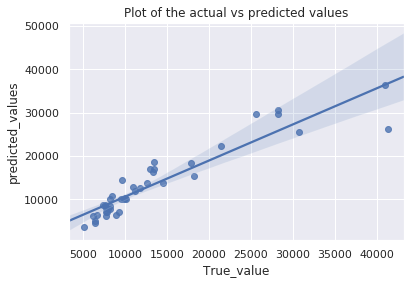

In [166]:
#scatter plot of the actual and predicted value 
sns.regplot(x = 'True_value', y = 'predicted_values', data = df_result, fit_reg= True);
plt.title('Plot of the actual vs predicted values');

In [168]:
#what is the correlation coefficient between the actual and predicted value 
df_result[['predicted_values','True_value']].corr()

,predicted_values,True_value
predicted_values,1.0000,0.9290
True_value,0.9290,1.0000


<h5> Compute the metrics of evaluation </h5> 

In [172]:
print(' The R-squared score of the Elasticnet regression model is {} '.format(r2_score(y_test, y_pred)))

 The R-squared score of the Elasticnet regression model is 0.862106786538655 


<h3> Compute the equation of Linear regression model. below we are we are going to assemble the both the intercept and the coefficient into an equation </h3> 

In [176]:
gridsearch.best_estimator_.steps[3][1].intercept_

array([13223.41463415])

In [177]:
gridsearch.best_estimator_.steps[3][1].coef_

array([ 692.57646986, 1208.4477954 ,  -81.2481381 ,  -14.00837016,
        694.74695074,  820.04845956, -275.3174283 , -426.61756881,
        200.32138246,  213.7878931 ,  182.20890901, -269.98304466,
       -345.93320753,  363.14701842,  841.22089589,  132.648529  ,
        -41.64202132,   69.70668009,  181.6148629 , -766.78453024,
        198.91282335,  140.06227399, -251.65838807,  280.4141007 ,
        330.92434137,  429.74182105,  865.19970579, 1064.08277056,
        241.13751804,  805.15085726, -432.73101063])

In [179]:
gridsearch.best_params_

{'select_feature__k': 31}

<h4> Given that the total number of variables it used in its modelling is 31, we have to find all 31 variables </h4> 

In [183]:
best_var = SelectKBest(f_regression, k= 31).fit(X_train, y_train).get_support()

In [188]:
df_best_var = pd.DataFrame(X_train, columns = X_train.columns[best_var])
df_best_var.head()

,CarName_bmw,CarName_buick,CarName_dodge,CarName_honda,CarName_jaguar,CarName_porcshce,CarName_subaru,CarName_toyota,CarName_volvo,aspiration_turbo,carbody_hardtop,carbody_hatchback,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_ohc,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_mpfi,wheelbase,carlength,carwidth,enginesize,boreratio,horsepower,highwaympg
66,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,104.9000,175.0000,66.1000,134,3.4300,72,39
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,107.9000,186.7000,68.4000,120,3.4600,95,24
153,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,95.7000,169.7000,63.6000,92,3.0500,62,37
96,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,94.5000,165.3000,63.8000,97,3.1500,69,37
38,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,96.5000,167.5000,65.2000,110,3.1500,86,33


In [189]:
#Below is a list of all attributes with their appropriate coefficients
list(zip(df_best_var.columns, gridsearch.best_estimator_.steps[3][1].coef_))

[('CarName_bmw', 692.576469857095),
 ('CarName_buick', 1208.4477953958872),
 ('CarName_dodge', -81.24813810311637),
 ('CarName_honda', -14.008370163564056),
 ('CarName_jaguar', 694.7469507365338),
 ('CarName_porcshce', 820.0484595605602),
 ('CarName_subaru', -275.3174282971541),
 ('CarName_toyota', -426.61756880504686),
 ('CarName_volvo', 200.32138245897852),
 ('aspiration_turbo', 213.78789309643608),
 ('carbody_hardtop', 182.20890900871578),
 ('carbody_hatchback', -269.9830446567791),
 ('drivewheel_fwd', -345.9332075266657),
 ('drivewheel_rwd', 363.1470184181323),
 ('enginelocation_rear', 841.2208958878822),
 ('enginetype_dohcv', 132.64852899779677),
 ('enginetype_ohc', -41.64202131593317),
 ('enginetype_ohcv', 69.70668009443946),
 ('cylindernumber_five', 181.61486289564772),
 ('cylindernumber_four', -766.7845302375699),
 ('cylindernumber_six', 198.9128233549315),
 ('cylindernumber_twelve', 140.0622739914408),
 ('fuelsystem_2bbl', -251.6583880693977),
 ('fuelsystem_mpfi', 280.41410069